In [1]:
#Importar librerias relevantes para el EDA y ETL

import pandas as pd
import numpy as np
import matplotlib.pyplot as pltasdassadsadasd
%matplotlib inlinesaddasdasasd
dasdsadsad
pd.set_option('display.max_rows', None) #---> #max row settings
##pd.set_option('display.max_columns', None) ---> max columns settings
##pd.set_option('display.width', None) ---> max width settings
##pd.set_option('display.max_colwidth', None) ---> max col width settings

In [ ]:
# Lectura de los dataset tipo CSV con la librería Pandas .read_csv()

df_calendar = pd.read_csv("data/calendar.csv", sep=",", encoding="windows-1252")
df_listings = pd.read_csv(
    "data/listings.csv", sep=",", encoding="utf-8", low_memory=False
)
df_reviews = pd.read_csv("data/reviews.csv", sep=",", encoding="utf-8")

## Dataframe Listings

In [ ]:
# Observamos el tamaño del dataset Listing
df_listings.shape

# Se puede observar que el tamaño del dataset contiene 105 columnas, de las cuales solo se van a conservar las siguientes columnas para el objeto de este proyecto que es la visualización

### Columnas a conservar:

| Field                           | Description                                                                                                               |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| id                              | Airbnb's unique identifier for the listing                                                                               |
| name                            |                                                                                                                           |
| host_id                         |                                                                                                                           |
| host_name                       |                                                                                                                           |
| neighbourhood_group             | The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| neighbourhood                   | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| latitude                        | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                             |
| longitude                       | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                             |
| room_type                       |                                                                                                                           |
| price                           | Daily price in local currency. Note, $ sign may be used despite locale.                                                 |
| minimum_nights                  | Minimum number of night stay for the listing (calendar rules may be different).                                          |
| number_of_reviews               | The number of reviews the listing has.                                                                                    |
| last_review                     | The date of the last/newest review.                                                                                       |
| calculated_host_listings_count  | The number of listings the host has in the current scrape, in the city/region geography.                                  |
| availability_365                | Availability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host. |
| number_of_reviews_ltm           | The number of reviews the listing has (in the last 12 months).                                                           |
| license                         |                                                                                                                           |


In [ ]:
df_listings = df_listings[
    [
        "id",
        "name",
        "host_id",
        "host_name",
        "neighbourhood",
        "latitude",
        "longitude",
        "room_type",
        "price",
        "minimum_nights",
        "number_of_reviews",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
        "number_of_reviews_ltm",
    ]
]

In [ ]:
# Luego de tener la columnas a usar en listings, se observa la cantidad de vacios por columna, en esta línea de código veremos el % de vacíos de cada columna del total de datos
df_listings.isna().sum().sort_values(ascending=False) / len(df_listings) * 100

### Ahora vamos a analizar el dataset basados en variables categoricas o numéricas

In [ ]:
# Verificamos los tipos de datos del dataset para realizar un análisis por variables categóricas y numéricas
###df_listings.select_dtypes('O').head()
df_listings.select_dtypes("O").head()

Conclusiones:

* Se observa que los campos price, son datatype 'object', se cambian a float
* Se hará una copia al df_listings para hacer una análisis de la variables categóricas, donde se omiten los campos ya que son descriptivos y serán útiles solamente para la realización del dashboard en PBI

In [ ]:
# Cambiamos el tipo de datos
df_listings["price"] = (
    df_listings["price"].str.replace("[\\$,]", "", regex=True).astype(float)
)

Vamos a observar datos atipicos:

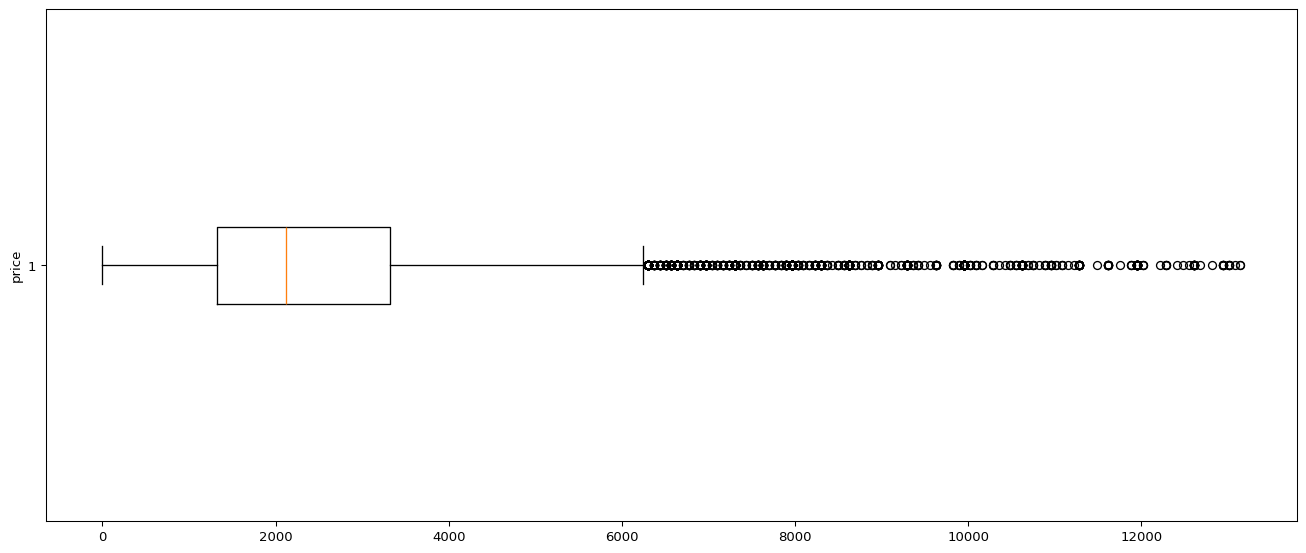

In [50]:
# Box Plots
fig, axs = plt.subplots(dpi=95, figsize=(17, 7))
axs.boxplot(df_listings["price"], vert=False)
axs.set_ylabel("price")
plt.show()

In [49]:
promedio = df_listings["price"].mean()
std = df_listings["price"].std()
umbral = 3 * std
df_listings = df_listings[
    (df_listings["price"] >= promedio - umbral)
    & (df_listings["price"] <= promedio + umbral)
]

In [ ]:
# Copia de listings
df_cat = df_listings.copy()

In [51]:
df_listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58,-58.42,Entire home/apt,3983.00,2,26,0.27,1,365,4
1,12463,Room in Recoleta - awesome location,48799,Matt,Recoleta,-34.60,-58.39,Private room,1593.00,1,20,0.16,1,365,0
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.59,-58.43,Private room,2987.00,1,1,0.06,7,365,0
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,Palermo,-34.59,-58.43,Private room,2987.00,1,0,NaN,7,365,0
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.59,-58.43,Private room,2987.00,1,66,1.89,7,365,5


In [ ]:
df_cat.drop(columns=["host_name"], inplace=True)

In [ ]:
def graficos_eda_categoricos(cat):

    # Calculamos el número de filas que necesitamos
    from math import ceil

    filas = ceil(cat.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[cada])
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize=12)

In [ ]:
graficos_eda_categoricos(df_listings.select_dtypes("number"))

Conclusiones:

* has_availabity solo tiene un valor --> Se elimina
* bed_type solo tiene un valor --> Se elimina

In [ ]:
df_listings.drop(columns=["has_availabity", "bed_type"], inplace=True)

In [ ]:
df_listings.select_dtypes("number")

In [ ]:
def estadisticos_cont(num):
    # Calculamos describe
    estadisticos = num.describe().T  # Añadimos la mediana
    estadisticos["median"] = num.median()
    # Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]
    # Lo devolvemos
    return estadisticos

In [ ]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
estadisticos_cont(df_listings.select_dtypes("number"))

In [ ]:
df_listings.head(5)